In [1]:
#google
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#import packages
import os
import tensorflow as tf
import keras
import pandas as pd
import numpy as np 
import itertools
from keras import layers
from keras.models import Model
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, GlobalMaxPooling2D
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

Using TensorFlow backend.


In [0]:
#load dataset
train_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/A2/dataset1/train/' #80
valid_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/A2/dataset1/val/' #10
test_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/A2/dataset1/test/' #10

In [0]:
#ImageGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
#datagen flow for multi-class
train_generator = train_datagen.flow_from_directory(train_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)
valid_generator = test_datagen.flow_from_directory(valid_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)

Found 900 images belonging to 4 classes.
Found 113 images belonging to 4 classes.
Found 112 images belonging to 4 classes.


In [6]:
class_dict = train_generator.class_indices
class_dict

{'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}

In [0]:
#VGG16
model = VGG16(weights= 'imagenet', include_top=False, input_tensor=None, input_shape=(224,224,3))

In [8]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
#adding new layers
x = model.output  
x = Flatten()(x)
# add a fully-connected layer
x = Dense(256,activation = "relu")(x)
#add logistic layer
predictions = Dense(4, activation='softmax')(x)
#model to train
model = Model(input=model.input, output=predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':


In [0]:
for layer in model.layers[:-4]:
    layer.trainable = False

In [0]:
#compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-5), metrics=['acc'])

In [13]:
#train model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  
      epochs=25,
      validation_data=valid_generator,
      validation_steps=10,  
      verbose=1)

Epoch 1/25
100/100 [==============================] - 18s 184ms/step - loss: 1.0660 - acc: 0.5879 - val_loss: 1.0203 - val_acc: 0.7125
Epoch 2/25
100/100 [==============================] - 17s 169ms/step - loss: 0.7085 - acc: 0.7625 - val_loss: 0.4773 - val_acc: 0.7945
Epoch 3/25
100/100 [==============================] - 16s 159ms/step - loss: 0.5487 - acc: 0.8304 - val_loss: 0.7765 - val_acc: 0.8356
Epoch 4/25
100/100 [==============================] - 16s 162ms/step - loss: 0.4812 - acc: 0.8442 - val_loss: 0.4758 - val_acc: 0.8250
Epoch 5/25
100/100 [==============================] - 16s 165ms/step - loss: 0.4165 - acc: 0.8775 - val_loss: 0.4553 - val_acc: 0.9452
Epoch 6/25
100/100 [==============================] - 16s 160ms/step - loss: 0.3386 - acc: 0.8888 - val_loss: 1.6620 - val_acc: 0.9041
Epoch 7/25
100/100 [==============================] - 16s 164ms/step - loss: 0.3485 - acc: 0.8970 - val_loss: 0.2951 - val_acc: 0.9000
Epoch 8/25
100/100 [==============================] - 1

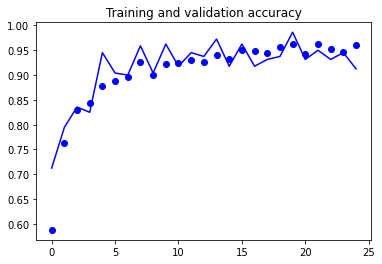

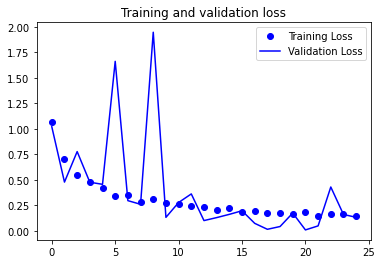

In [14]:
#plot graph
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
test_loss, test_acc = model.evaluate(test_generator)
test_acc

14/14 [==============================] - 1s 93ms/step


0.9196428656578064